# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

from wordcloud import WordCloud 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10 #10
page_size = 100 #100

reviews = []
aircraft = []
seat_type = []
route = []
recommended = []
df = pd.DataFrame()

# for i in range(1, pages + 1):
for i in range(1, pages + 1):
    
    rating = []
    category = []

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
        
    for para2 in parsed_content.find_all("div", {"class" : "review-stats"}):
        for para3 in para2.find_all('td',{'class' : 'review-value'}):
            rating.append(para3.get_text())
        recomend = rating[-1]
        rating = rating[:-1]
        
        for para4 in para2.find_all('td',{'class' : 'review-rating-stars stars'}):
            para5 = len(para4.find_all('span', {'class' : 'star fill'}))
            rating.append(para5)
        rating.append(recomend)
        #print(rating)
        
        for para6 in para2.find_all('td',{'class' : 'review-rating-header'}):
            category.append(para6.get_text())
            
        #print(category)
        # Create the records from both list, using zip and dict calls.

        # Build the dataframe from the dictionary.
        data_dict = pd.DataFrame([rating], columns=category)
        df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
        #print(df)
        rating = []
        category = []
        
    print(f"   ---> {len(reviews)} total reviews")

df["reviews"] = reviews

Scraping page 1


C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat ins

C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat ins

C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat ins

C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)


   ---> 100 total reviews
Scraping page 2


C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat ins

C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat ins

C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat ins

   ---> 200 total reviews
Scraping page 3


C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat ins

C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat ins

C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat ins

   ---> 300 total reviews
Scraping page 4


C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat ins

C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat ins

C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat ins

   ---> 400 total reviews
Scraping page 5


C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat ins

C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat ins

C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat ins

C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat ins

   ---> 500 total reviews
Scraping page 6


C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat ins

C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat ins

C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat ins

   ---> 600 total reviews
Scraping page 7


C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat ins

C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat ins

C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat ins

   ---> 700 total reviews
Scraping page 8


C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat ins

C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat ins

C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat ins

   ---> 800 total reviews
Scraping page 9


C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat ins

C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat ins

C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat ins

C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)


   ---> 900 total reviews
Scraping page 10


C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat ins

C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat ins

C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat ins

   ---> 1000 total reviews


C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)


In [3]:
df


,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Value For Money,Recommended,Inflight Entertainment,Wifi & Connectivity,reviews
0,A320,Solo Leisure,Business Class,London Heathrow to Brussels,March 2024,2.0,4.0,3.0,3.0,3,yes,NaN,NaN,✅ Trip Verified | Boarding was difficult caus...
1,Boeing 777,Solo Leisure,Business Class,Barbados to London heathrow,March 2024,3.0,3.0,2.0,1.0,2,no,2.0,NaN,✅ Trip Verified | Boarding started with a del...
2,NaN,Family Leisure,Economy Class,Toronto to Mumbai via London,February 2024,2.0,1.0,2.0,1.0,1,no,NaN,NaN,✅ Trip Verified | Absolutely horrible custome...
3,NaN,Family Leisure,Economy Class,Copenhagen to Port of Spain via London,February 2024,3.0,4.0,1.0,2.0,5,yes,NaN,NaN,Not Verified | BA is not what it used to be! ...
4,Boeing 777-300ER,Solo Leisure,First Class,Los Angeles to London,March 2024,2.0,1.0,1.0,3.0,1,no,NaN,3.0,"✅ Trip Verified | BA First, it's not even the..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Boeing 747-400,Solo Leisure,Economy Class,London to Vancouver,March 2019,3.0,5.0,4.0,4.0,4,yes,4.0,NaN,✅ Trip Verified | London to Vancouver. Check ...
996,Boeing 777,Solo Leisure,First Class,London to Mumbai,March 2019,4.0,5.0,2.0,4.0,4,yes,3.0,NaN,✅ Trip Verified | The First Class zone at Heat...
997,Boeing 777,Business,First Class,London to Chicago,March 2019,2.0,2.0,1.0,2.0,2,no,1.0,NaN,✅ Trip Verified | I had a miserable experienc...
998,NaN,Solo Leisure,Economy Class,Leeds Bradford to Las Vegas via Heathrow,September 2018,3.0,5.0,3.0,5.0,3,yes,4.0,NaN,✅ Trip Verified | Leeds Bradford to Las Vegas...


In [6]:
df.to_csv("British_Airways_reviews.csv", index=False)

Now we have our dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

The next thing that we should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [7]:
df = pd.read_csv('British_Airways_reviews.csv')

### Data cleaning

In [8]:
df.shape

(1000, 14)

In [9]:
# work on removinf the verifications
remove_text = ['✅ Trip Verified', 'Not Verified |']

for i in range(len(df['reviews'])):
    for j in remove_text:
        if j in df['reviews'][i]:
            df['reviews'] = df['reviews'].str.replace(j,'')

C:\Users\JIMMY\AppData\Local\Temp\ipykernel_3824\2197183156.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df['reviews'] = df['reviews'].str.replace(j,'')


In [10]:
df

,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Value For Money,Recommended,Inflight Entertainment,Wifi & Connectivity,reviews
0,A320,Solo Leisure,Business Class,London Heathrow to Brussels,March 2024,2.0,4.0,3.0,3.0,3,yes,NaN,NaN,| Boarding was difficult caused by vast majo...
1,Boeing 777,Solo Leisure,Business Class,Barbados to London heathrow,March 2024,3.0,3.0,2.0,1.0,2,no,2.0,NaN,| Boarding started with a delay of some 20 m...
2,NaN,Family Leisure,Economy Class,Toronto to Mumbai via London,February 2024,2.0,1.0,2.0,1.0,1,no,NaN,NaN,| Absolutely horrible customer service - wil...
3,NaN,Family Leisure,Economy Class,Copenhagen to Port of Spain via London,February 2024,3.0,4.0,1.0,2.0,5,yes,NaN,NaN,| BA is not what it used to be! As much as I ...
4,Boeing 777-300ER,Solo Leisure,First Class,Los Angeles to London,March 2024,2.0,1.0,1.0,3.0,1,no,NaN,3.0,"| BA First, it's not even the best business ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Boeing 747-400,Solo Leisure,Economy Class,London to Vancouver,March 2019,3.0,5.0,4.0,4.0,4,yes,4.0,NaN,| London to Vancouver. Check in agent very h...
996,Boeing 777,Solo Leisure,First Class,London to Mumbai,March 2019,4.0,5.0,2.0,4.0,4,yes,3.0,NaN,| The First Class zone at Heathrow T5 and the...
997,Boeing 777,Business,First Class,London to Chicago,March 2019,2.0,2.0,1.0,2.0,2,no,1.0,NaN,| I had a miserable experience in first clas...
998,NaN,Solo Leisure,Economy Class,Leeds Bradford to Las Vegas via Heathrow,September 2018,3.0,5.0,3.0,5.0,3,yes,4.0,NaN,| Leeds Bradford to Las Vegas via Heathrow. ...


### Analysing the data

### Route Analysis

From a route analysis, we can be able to determine the destinations that most of our customers love as well as their satisfactions and maybe work on making that experience more joyful.

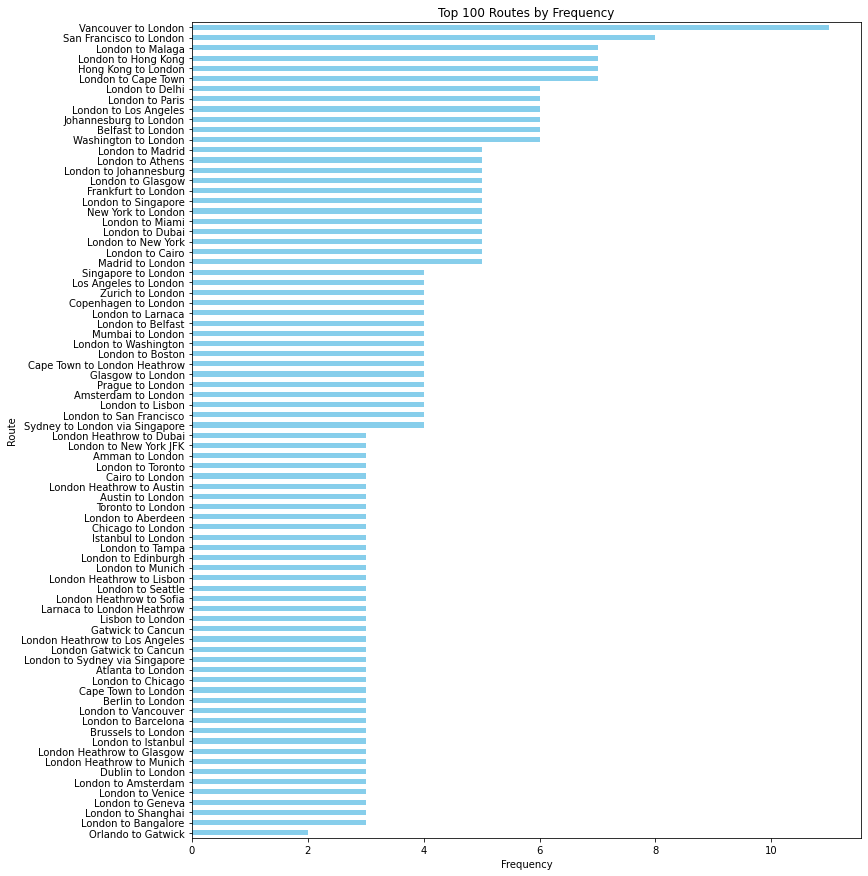

In [25]:
top_routes = df['Route'].value_counts().nlargest(80)

plt.figure(figsize=(12, 15))
top_routes.sort_values().plot(kind='barh', color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Route')
plt.title('Top 100 Routes by Frequency')
plt.show()


### Inflight Entertainment and Wifi Analysis
We will visuallise a boxplot to copare ratings for inflight entertainment and wifi connectivity to see their impact on overall satisfaction

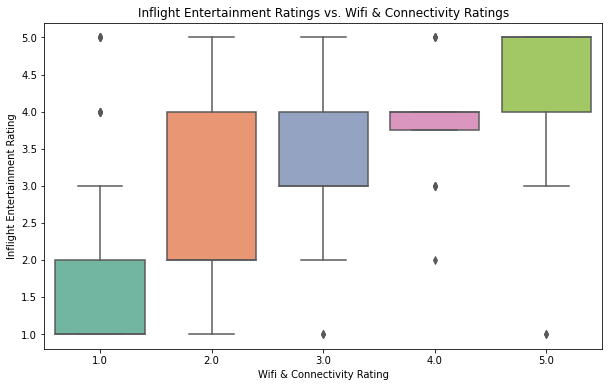

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Wifi & Connectivity', y='Inflight Entertainment', data=df, palette='Set2')
plt.xlabel('Wifi & Connectivity Rating')
plt.ylabel('Inflight Entertainment Rating')
plt.title('Inflight Entertainment Ratings vs. Wifi & Connectivity Ratings')
plt.show()


### Recommened vs not recommended
I create a a pie chart to visualize the proportion of customers who recommend Bfritish Airways and explore their rating in other categories

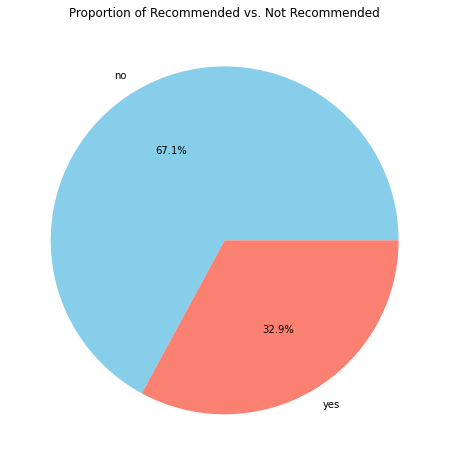

In [27]:
plt.figure(figsize=(8, 8))
df['Recommended'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('Proportion of Recommended vs. Not Recommended')
plt.ylabel('')
plt.show()


### Correlation Heatmap
From the above correlation heatmap, we can notice that there is a very high positive relationship between amenities enjoyed by the customers.The more the quality of amenities in the plane, the better our customers tend to appreciate.

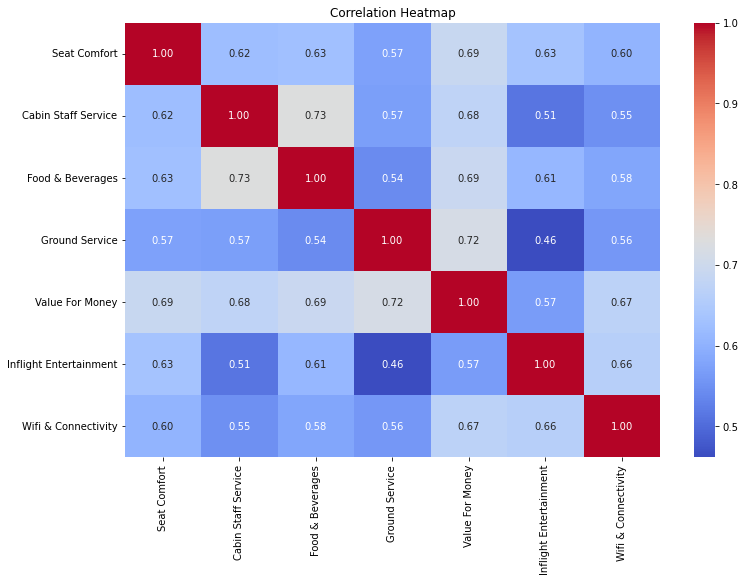

In [20]:
import seaborn as sns
correlation_data = df[['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Ground Service', 'Value For Money', 'Inflight Entertainment', 'Wifi & Connectivity']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()
